In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
dept = pd.read_csv('DepartmentData.csv')
emp = pd.read_csv('EmployeeData.csv')

In [87]:
dept['department_id']

,department_id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [88]:
emp.head()

,name,age,bonus,base_salary,department_id
0,Steve Smith,46,26048.96,59545,7
1,Eva Brown,31,46217.53,95261,17
2,Charlie Anderson,34,33768.80,97466,8
3,Rachel Martinez,49,30688.55,93735,7
4,Nina White,24,26566.34,56517,1


In [89]:
emp['total_salary'] = emp['base_salary'] + emp['bonus']

In [90]:
def remean(row):
    taxed_salary = row.total_salary - row.tax_rate*row.total_salary
    return taxed_salary

In [91]:
joined = emp.join(dept.set_index('department_id'), on='department_id', how='left')

joined['taxed_salary'] = joined.apply(remean, axis = 'columns')
joined.head()

,name,age,bonus,base_salary,department_id,total_salary,department_name,tax_rate,taxed_salary
0,Steve Smith,46,26048.96,59545,7,85593.96,Accounts,0.12,75322.6848
1,Eva Brown,31,46217.53,95261,17,141478.53,Legal,0.14,121671.5358
2,Charlie Anderson,34,33768.80,97466,8,131234.80,Operations,0.30,91864.3600
3,Rachel Martinez,49,30688.55,93735,7,124423.55,Accounts,0.12,109492.7240
4,Nina White,24,26566.34,56517,1,83083.34,Talent Acquisition,0.22,64805.0052


In [92]:
tax_joined = joined.groupby(['department_id','department_name']).taxed_salary.mean()
tax_joined = tax_joined.sort_values(ascending=False)
tax_joined

,,taxed_salary
department_id,department_name,
7,Accounts,87621.851240
17,Legal,84939.271700
19,Logistics,83338.993455
11,Technical,82845.040600
2,HR,82318.159900
12,Engineering,77359.799700
18,Business Development,76212.396535
6,Education,70849.017375
10,Sales,70457.413325


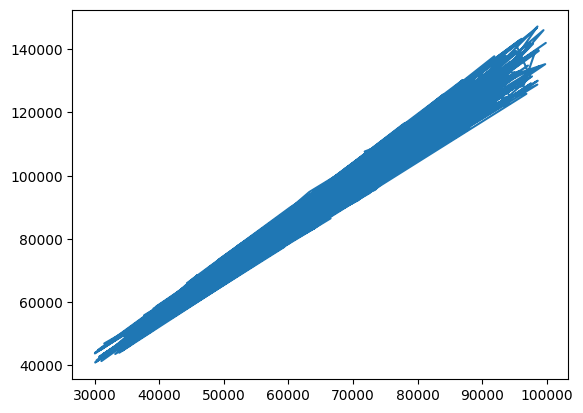

In [ ]:
plt.plot(emp['base_salary'], emp['total_salary'])
plt.show()